In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
# đọc dữ liệu
df = pd.read_csv("Credit_Scoring.csv", encoding = "ISO-8859-1")
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [4]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# kiểm tra dữ liệu không bị khuyết
df['MonthlyIncome'].notna()

0         False
1          True
2          True
3          True
4          True
          ...  
149987     True
149988     True
149989    False
149990     True
149991     True
Name: MonthlyIncome, Length: 149992, dtype: bool

In [8]:
# xóa những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [9]:
df1.shape
df1

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,14,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149986,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [10]:
# xóa những dòng chứa toàn giá trị khuyết
df2 = df.dropna(how='all')

In [11]:
df2.shape
df2

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [12]:
# thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df3 = df
df4 = df3.fillna(-1)
df4

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,-1.0,2,0,0,0,-1.0
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,149998,0,0.246044,58,0,3870.000000,-1.0,18,0,1,0,0.0
149990,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


<AxesSubplot:xlabel='DebtRatio'>

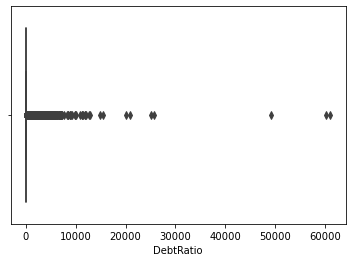

In [13]:
sns.boxplot(x=df1['DebtRatio'])  # vẽ box plot cho dữ liệu ở cột Quantity

In [15]:
Q1 = df1['DebtRatio'].quantile(0.25)
Q3 = df1['DebtRatio'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
# xác định phần tử không phải ngoại lai
df6 = df1
df6['outlier'] = ~((df1['DebtRatio'] < (Q1 - 1.5*IQR)) | (df1['DebtRatio'] > (Q3 + 1.5*IQR)))

C:\Users\Asus\AppData\Local\Temp\ipykernel_21024\3590076086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['outlier'] = ~((df1['DebtRatio'] < (Q1 - 1.5*IQR)) | (df1['DebtRatio'] > (Q3 + 1.5*IQR)))


In [17]:
# xóa phần tử ngoại lai
df6 = df6[df6['outlier'] == True]

<AxesSubplot:xlabel='DebtRatio'>

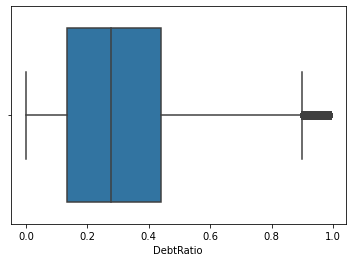

In [18]:
sns.boxplot(x=df6['DebtRatio'])  # vẽ box plot cho dữ liệu ở cột Quantity

<AxesSubplot:xlabel='DebtRatio'>

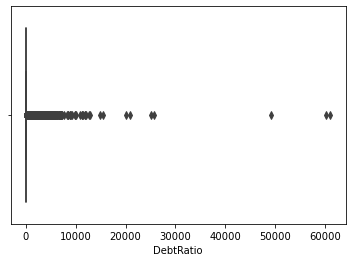

In [20]:
# vẽ biểu đồ hộp cho cột Quantity
sns.boxplot(x=df1["DebtRatio"])

In [21]:
# mô tả dữ liệu
df1['DebtRatio'].describe()

count    120262.000000
mean         26.600312
std         424.458762
min           0.000000
25%           0.143402
50%           0.296029
75%           0.482560
max       61106.500000
Name: DebtRatio, dtype: float64

In [22]:
# chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với MinMaxScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['DebtRatio']])

In [23]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,120262.000000
mean,0.000435
std,0.006946
min,0.000000
25%,0.000002
50%,0.000005
75%,0.000008
max,1.000000


<AxesSubplot:>

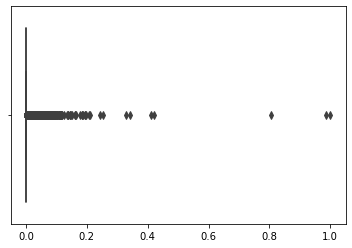

In [24]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [25]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với RobustScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['DebtRatio']])

In [26]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,120262.000000
mean,77.557729
std,1251.509425
min,-0.872838
25%,-0.450019
50%,0.000000
75%,0.549981
max,180170.600685


<AxesSubplot:>

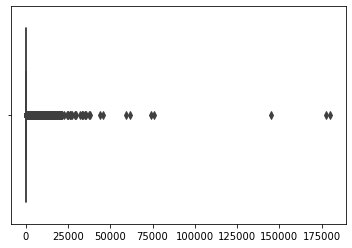

In [27]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [28]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Quantity và UnitPrice
df_s = scaler.fit_transform(df1[['DebtRatio']])
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

,0
count,1.202620e+05
mean,3.346100e-17
std,1.000004e+00
min,-6.266904e-02
25%,-6.233119e-02
50%,-6.197161e-02
75%,-6.153215e-02
max,1.439013e+02


<AxesSubplot:>

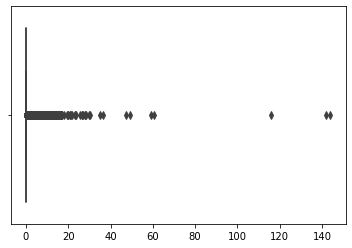

In [29]:
sns.boxplot(x=df_s)

<AxesSubplot:ylabel='Density'>

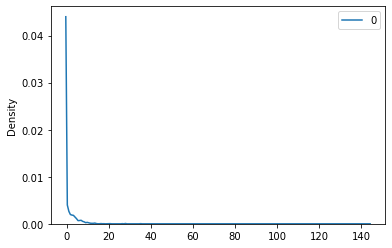

In [30]:
sns.kdeplot(data=df_s)

In [31]:
df1.head()
# Rời rạc hóa dữ liệu ở cột MonthlyIncome

# chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df1['MonthlyIncome'], 4)
cats

1         (-3008.75, 752187.5]
2         (-3008.75, 752187.5]
3         (-3008.75, 752187.5]
4         (-3008.75, 752187.5]
5         (-3008.75, 752187.5]
                  ...         
149986    (-3008.75, 752187.5]
149987    (-3008.75, 752187.5]
149988    (-3008.75, 752187.5]
149990    (-3008.75, 752187.5]
149991    (-3008.75, 752187.5]
Name: MonthlyIncome, Length: 120262, dtype: category
Categories (4, interval[float64, right]): [(-3008.75, 752187.5] < (752187.5, 1504375.0] < (1504375.0, 2256562.5] < (2256562.5, 3008750.0]]

In [32]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(-3008.75, 752187.5]      120257
(752187.5, 1504375.0]          2
(1504375.0, 2256562.5]         2
(2256562.5, 3008750.0]         1
Name: MonthlyIncome, dtype: int64

In [33]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df1['MonthlyIncome'], 4)
cats

1         (8249.0, 3008750.0]
2            (-0.001, 3400.0]
3            (5400.0, 8249.0]
4         (8249.0, 3008750.0]
5         (8249.0, 3008750.0]
                 ...         
149986       (-0.001, 3400.0]
149987       (-0.001, 3400.0]
149988       (5400.0, 8249.0]
149990       (5400.0, 8249.0]
149991       (5400.0, 8249.0]
Name: MonthlyIncome, Length: 120262, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 3400.0] < (3400.0, 5400.0] < (5400.0, 8249.0] < (8249.0, 3008750.0]]

In [ ]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)